In [1]:
import numpy as np
import pygtrie
from statsmodels.stats import multitest
import collections
import os
import sys
sys.path.append('../../scripts/')

import matplotlib.pyplot as plt
import mpl_stylesheet
mpl_stylesheet.banskt_presentation(fontfamily = 'latex-clearsans', fontsize = 24)

In [2]:
# from scipy.stats import norm

from scipy import stats

# def read_tejaas(filename):
#     rsidlist = list()
#     bplist   = list()
#     qscales = list()

#     with open(filename, 'r') as instream:
#         next(instream)
#         for line in instream:
#             linesplit = line.strip().split()
#             rsid = linesplit[0]
#             bppos = int(linesplit[1])
#             #pval = float(linesplit[5])
            
#             qstat = float(linesplit[2])
#             qmean = float(linesplit[3])
#             qstd  = float(linesplit[4])
#             qscale = (qstat - qmean) / qstd
            
#             rsidlist.append(rsid)
#             bplist.append(bppos)
#             qscales.append(-qscale)

#     #pvalarr = 2.0 * (1 - stats.norm.cdf(np.abs(qscales)))
#     pvalarr = 1 - stats.norm.cdf(np.array(qscales))
#     pvallist = [x for x in pvalarr]
#     return rsidlist, pvallist, bplist, qscales

def read_tejaas(filename):
    rsidlist = list()
    qscrlist = list()
    qmeanlist = list()
    qvarlist  = list()
    qscalelist = list()
    with open(filename, 'r') as instream:
        next(instream)
        for line in instream:
            linesplit = line.strip().split()
            rsid = linesplit[0]
            qscr = float(linesplit[2])
            qmean = float(linesplit[3])
            qvar = float(linesplit[4])
            #pval = float(linesplit[5])
            
            qscale = (qscr - qmean) / qvar
            rsidlist.append(rsid)
            qscrlist.append(qscr)
            qmeanlist.append(qmean)
            qvarlist.append(qvar)
            qscalelist.append(qscale)
            
    pvalarr = 1 - stats.norm.cdf(np.array(qscalelist))
    pvallist = [x for x in pvalarr]
    return rsidlist, pvallist, qscrlist, qmeanlist, qvarlist, qscalelist

In [3]:
pvals = list()
qstat = list()
qmean = list()
qvars = list()
qscale = list()

for sim in range(5):
    simdir = "sim{:03d}".format(sim)
    paramdir = "15158_361_20_800_30_150_100_0.01_0.0_0.0_1.0_0.6_4.0_0.1_20_0.02"
    srcdir = os.path.join('/scratch/sbanerj/trans-eqtl/simulation/', paramdir, simdir)
    rrfile = os.path.join(srcdir, 'tejaas/permnull_sb0.05/rr.txt')
    
    rr_rsids, rr_pvals, rr_qstats, rr_qmeans, rr_qvars, rr_qscale = read_tejaas(rrfile)
    pvals += rr_pvals
    qstat += rr_qstats
    qmean += rr_qmeans
    qvars += rr_qvars
    qscale += rr_qscale

qstat = np.array(qstat)
pvals = np.array(pvals)
pmin  = np.min(pvals[np.where(pvals > 0)])
nonzero_pvals = pvals.copy()
nonzero_pvals[np.where(pvals == 0)] = pmin
log10pvals = -np.log10(nonzero_pvals)
qmean = np.array(qmean)
qvars = np.array(qvars)
qscale = np.array(qscale)
#select, pcorr = multitest.fdrcorrection(pvals, alpha = 0.005)

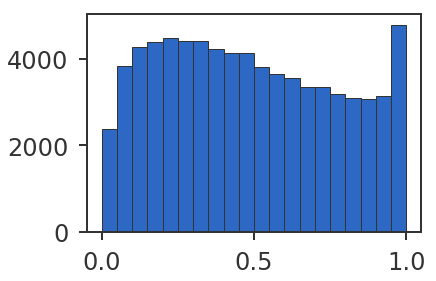

In [4]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

nchoose = np.sort(np.random.choice(pvals.shape[0], size = 10000, replace = False))
ax1.hist(pvals)
#ax1.hist(np.abs(qscale))
#ax1.scatter(qstat[nchoose], log10pvals[nchoose], alpha = 0.1)
#ax1.scatter(qmean, qvars, alpha = 0.1)
plt.show()

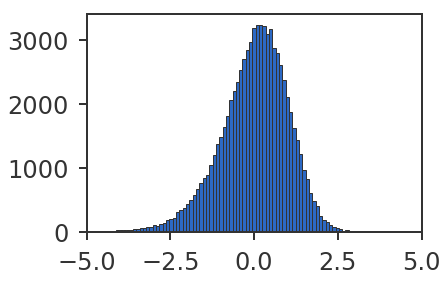

In [5]:
# Check the p-value distribution
fig = plt.figure()
ax1 = fig.add_subplot(111)


ax1.hist(qscale, bins = 100)
#ax2.hist(gwqscaled2[nchoose])
ax1.set_xlim([-5, 5])
plt.show()

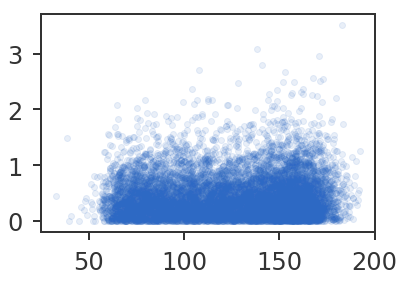

In [6]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

nchoose = np.sort(np.random.choice(pvals.shape[0], size = 10000, replace = False))
#ax1.hist(pvals)
ax1.scatter(qstat[nchoose], log10pvals[nchoose], alpha = 0.1)
plt.show()

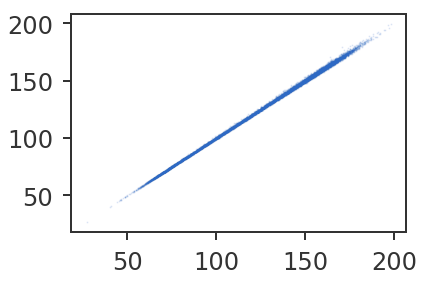

In [7]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

nchoose = np.sort(np.random.choice(pvals.shape[0], size = 10000, replace = False))
#ax1.hist(pvals)
ax1.scatter(qstat[nchoose], qmean[nchoose], s = 1, alpha = 0.1)
plt.show()

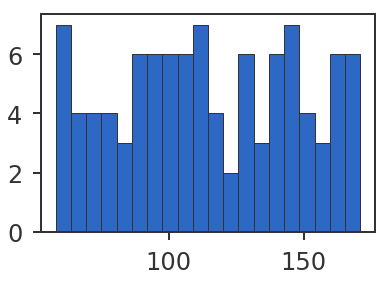

In [8]:
plt.hist(qstat[np.argsort(pvals)[::-1]][:100])
plt.show()

In [ ]:
pvals.shape

In [ ]:
np.sum(pvals<0.05)